Мы - онлайн магазин спортивных товаров: одежды, обуви, аксессуаров и спорт-питания. На главной странице магазина мы показываем пользователям баннеры с целью стимулирования своих продаж. Сейчас там случайно показывается один из 5 баннеров. Каждый баннер рекламирует конкретный продукт или всю компанию. Наши маркетологи считают, что опыт взаимодействия с баннерами может различаться по сегментам, а их эффективность - зависеть от особенностей пользовательского поведения.
У менеджера компании появилось предложение от партнеров: продать это место для баннера и рекламировать там другой сервис (оплата предполагается по CPC-модели, т.е. стоимость за клик <br> 

### Менеджер должен принять решение - нужно ли продавать это место для рекламы другого сервиса.)


In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

- order_id - уникальный номер покупки (NA для кликов и показов баннера)
- page_id - уникальный номер страницы для связки событий (NA для покупок)
- product - продукт баннера/покупки
- site_version - версия сайта (мобильная или десктопная)
- time - время совершения действия
- title - тип события (показ, клик или покупка)
- user - уникальный идентификатор клиента





In [2]:
df = pd.read_csv('ha_data.csv', sep=';')
df

,order_id,page_id,product,site_version,time,title,user
0,NaN,3.0,company,mobile,2017-02-09 20:24:04,banner_show,user_0
1,NaN,3699687.0,company,mobile,2017-02-07 10:03:07,banner_show,user_0
2,NaN,14.0,sneakers,mobile,2017-01-29 13:02:23,banner_show,user_1
3,NaN,10362176.0,company,mobile,2017-04-12 15:39:19,banner_show,user_1
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1
...,...,...,...,...,...,...,...
8471221,NaN,24897184.0,accessories,desktop,2017-05-23 14:07:00,banner_show,user_4254616
8471222,NaN,24897190.0,clothes,mobile,2017-05-28 08:10:20,banner_show,user_4254617
8471223,NaN,24897203.0,sports_nutrition,mobile,2017-05-20 09:20:50,banner_show,user_4254618
8471224,NaN,24897205.0,sneakers,mobile,2017-05-28 19:25:42,banner_show,user_4254619


In [3]:
df.info()
# в данных нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471226 entries, 0 to 8471225
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   order_id      float64
 1   page_id       float64
 2   product       object 
 3   site_version  object 
 4   time          object 
 5   title         object 
 6   user          object 
dtypes: float64(2), object(5)
memory usage: 452.4+ MB


In [4]:
# В данных нет дубликатов
df.duplicated().sum()

np.int64(0)

In [5]:
# В данных нет пропусков (исключая order_id и page_id из условия)
df.isnull().sum()

order_id        8222504
page_id          248722
product               0
site_version          0
time                  0
title                 0
user                  0
dtype: int64

In [8]:
# кол-во уникальных users
uniq_users = len(list(df['user'].unique()))
uniq_users = f'{uniq_users:,}'.replace(',', ' ')
uniq_users

'4 254 621'

In [10]:
# time в datetime
df['time'] = pd.to_datetime(df['time'])

# год, месяц, день, час
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

In [11]:
print(df['product'].unique())
print('----------------')
print(df['title'].unique())
print('----------------')
print(df['month'].unique())
print('----------------')
print(df['year'].unique())

['company' 'sneakers' 'sports_nutrition' 'accessories' 'clothes']
----------------
['banner_show' 'banner_click' 'order']
----------------
[2 1 4 3 5]
----------------
[2017]


In [12]:
# кол-во просмторов, кликов и покупок по каждому продукту
product_click = pd.pivot_table(df, index = 'product', columns = 'title', aggfunc = 'size', fill_value = 0)   
product_click

title,banner_click,banner_show,order
product,,,
accessories,136254,1440954,44551
clothes,220595,1453128,112715
company,144821,1580238,0
sneakers,182597,1453029,67719
sports_nutrition,144918,1465970,23737


<Axes: xlabel='title', ylabel='product'>

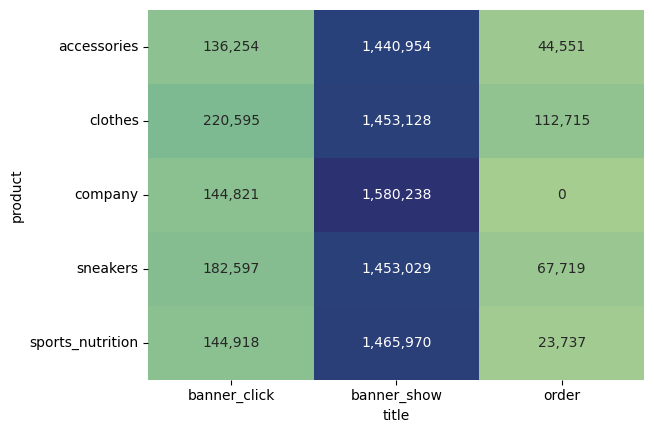

In [13]:
sns.heatmap(product_click, cmap='crest', cbar = False, annot=True, fmt=',.0f')

In [14]:
# CTR - количество кликов / на количество показов
product_click['CTR %'] = round( (product_click['banner_click'] / product_click['banner_show']) * 100 , 2)

# Конверсия - количество покупок / на количество кликов
product_click['Conversion %'] = round( (product_click['order'] / product_click['banner_click']) * 100, 2)
product_click.sort_values(['CTR %'])

title,banner_click,banner_show,order,CTR %,Conversion %
product,,,,,
company,144821,1580238,0,9.16,0.00
accessories,136254,1440954,44551,9.46,32.70
sports_nutrition,144918,1465970,23737,9.89,16.38
sneakers,182597,1453029,67719,12.57,37.09
clothes,220595,1453128,112715,15.18,51.10


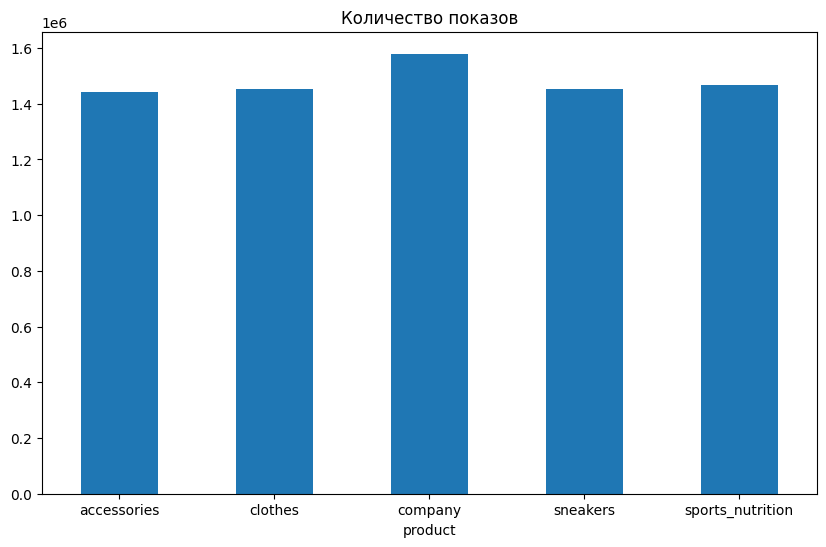

In [15]:
df_banner_show = df[df['title'] == 'banner_show']
df_banner_show_by_pruduct = df_banner_show.groupby('product').size()

plt.figure(figsize=(10, 6))

df_banner_show_by_pruduct.plot(kind = 'bar')

plt.title('Количество показов')
plt.xticks(rotation = 0)
plt.show()

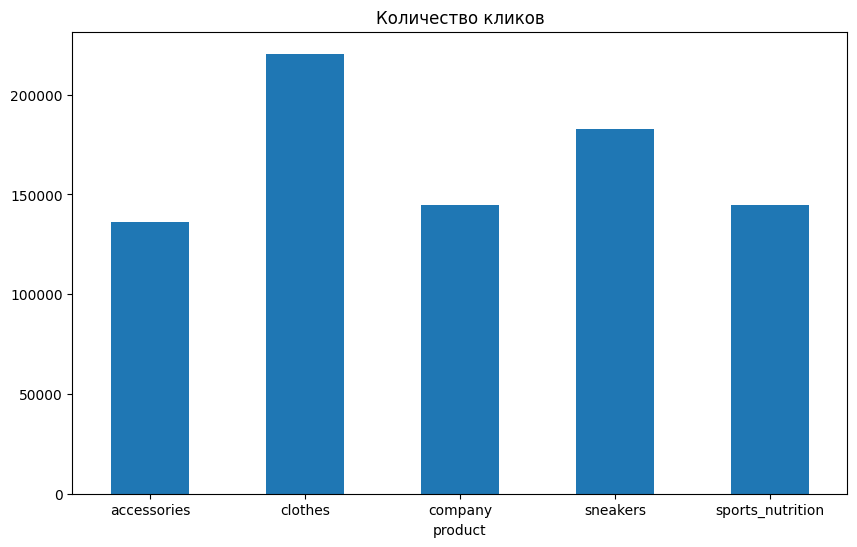

In [17]:
df_banner_click = df[df['title'] == 'banner_click']
df_banner_click_by_product = df_banner_click.groupby('product').size()

plt.figure(figsize=(10, 6))

df_banner_click_by_product.plot(kind = 'bar')

plt.title('Количество кликов')
plt.xticks(rotation = 0)
plt.show()

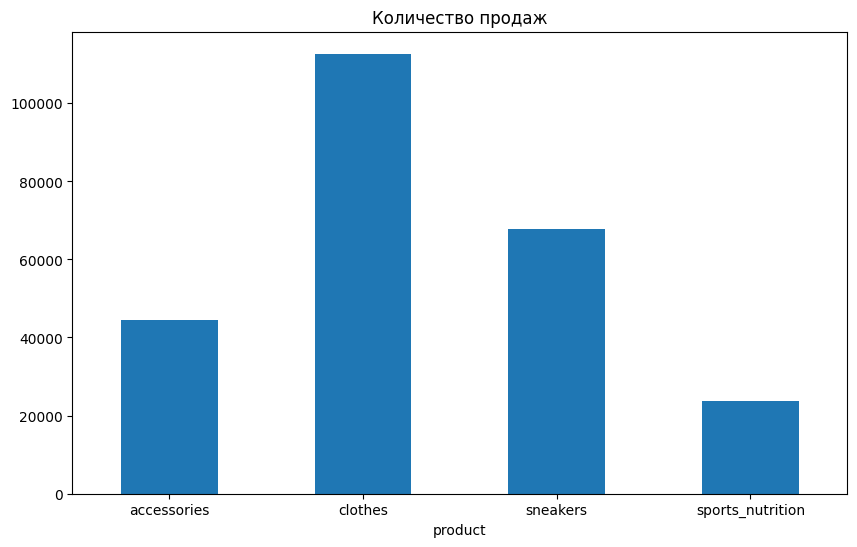

In [18]:
orders_ = df[df['title'] == 'order']
orders_by_product = orders_.groupby('product').size()

plt.figure(figsize=(10, 6))

orders_by_product.plot(kind = 'bar')

plt.title('Количество продаж')
plt.xticks(rotation = 0)
plt.show()

## Вывод по CTR и Конверсии в зависимости от продукта
- Наибольший CTR и Конверсию имеет одежда, 15.18% и 51.1% соотвественно. Это говорит о том, что самый просматриваемый и продаваемый продукт - одежда.
- Далее идет обувь. 12.57% - СTR, 37.09% - Конверсия. Обувь является менее популярным продуктом, но её разнообразие, как правило меньше, чем одежды.
- CTR аксессуаров и спортиного питания в пределах 9-10%, однако Конверсия аксессуаров в 2 раза выше, чем у спортивного питания (32.7% и 16.38%). Возможно, это связано с тем, что аксессуары - продукт на весь круг покупателей, а спортивное питание - на определенный.
- CTR баннера о информации о компании 9.16%. Это говорит о том, что потенциальным покупателям интересно узнать про политику компании.
- Количество показов баннеров имеет равномерное распределение, а количество кликов и продаж нет. Это может говорить о том, что текущая стратегия показа баннеров не учитывает различия в предпочтениях пользователей. Возможно, проведение таргетированного показа сможет повысить эффективность магазина.

# Посмотрим на количество кликов и продаж по месяцам

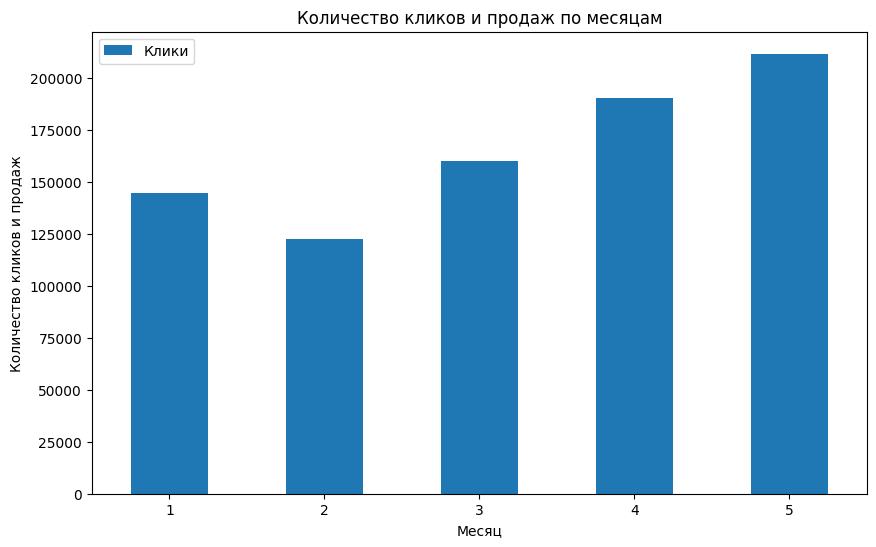

In [19]:
click_data = df[df['title'] == 'banner_click']
clicks_month = click_data.groupby('month').size()

plt.figure(figsize=(10, 6))
clicks_month.plot(kind = 'bar', label = 'Клики')

plt.title('Количество кликов и продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество кликов и продаж')
plt.xticks(rotation = 0)
plt.legend()
plt.show()

### Вывод 
- Начиная со второго месяца количество кликов по баннерам растет.
- Количество продаж также растет с каждым месяцем, однако продажи в 5 месяце ниже, чем в 4. Это может быть связано c тем, что цены в мае стале чуть выше, так как начинается теплый сезон и нужда людей в одежде под соотвествующий сезон стала выше.

# Рассмотрим количество кликов в зависимости от интервала времени

In [20]:
# Функция для определения времени суток в зависимости он интервала времени
def day_time_interval(hour):
    if 0 <= hour < 6:
        return 'Ночь'
    elif 6 <= hour < 12:
        return 'Утро'
    elif 12 <= hour < 18:
        return 'День'
    else:
        return 'Вечер'

In [21]:
click_data.head()

,order_id,page_id,product,site_version,time,title,user,year,month,day,hour
4,NaN,14.0,sneakers,mobile,2017-01-29 13:04:42,banner_click,user_1,2017,1,29,13
6,NaN,18.0,sneakers,desktop,2017-01-11 09:24:43,banner_click,user_2,2017,1,11,9
10,NaN,6323332.0,company,desktop,2017-01-03 08:59:15,banner_click,user_3,2017,1,3,8
36,NaN,47.0,sports_nutrition,mobile,2017-02-04 03:18:45,banner_click,user_9,2017,2,4,3
37,NaN,1054379.0,sneakers,mobile,2017-01-21 21:00:42,banner_click,user_9,2017,1,21,21


In [22]:
# создание нового столбца при использовании функции day_time_interval
click_data.loc[:, 'time_interval'] = click_data['hour'].apply(day_time_interval)

# Кол-вл кликов в зависимости от интервала дня
clicks_by_time = click_data.groupby('time_interval').size()
clicks_by_time

C:\Users\Миша\AppData\Local\Temp\ipykernel_15876\1454770888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_data.loc[:, 'time_interval'] = click_data['hour'].apply(day_time_interval)


time_interval
Вечер    182179
День     250313
Ночь      78908
Утро     317785
dtype: int64

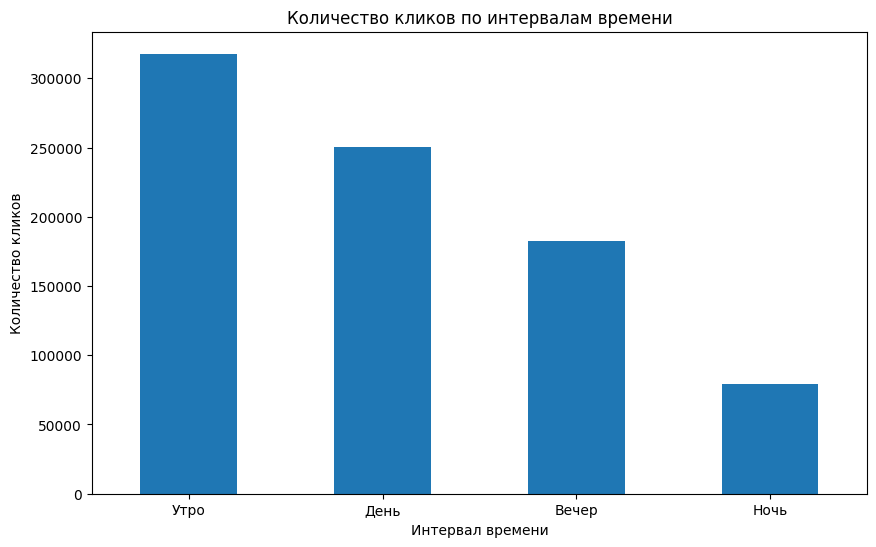

In [23]:
plt.figure(figsize=(10, 6))
clicks_by_time = clicks_by_time.reindex(['Утро', 'День', 'Вечер', 'Ночь'])  
clicks_by_time.plot(kind = 'bar')
plt.title('Количество кликов по интервалам времени')
plt.ylabel('Количество кликов')
plt.xlabel('Интервал времени')
plt.xticks(rotation=0)
plt.show()

### Вывод:
Пик активности пользователей приходится на утро. Это может быть связано с тем, что утро - время перед началом рабочего дня, а следоватльно времени, чтобы зайти в интернет-магазин, больше.

# Посмотрим на активность кликов и заказов от месяца и устройства пользователя

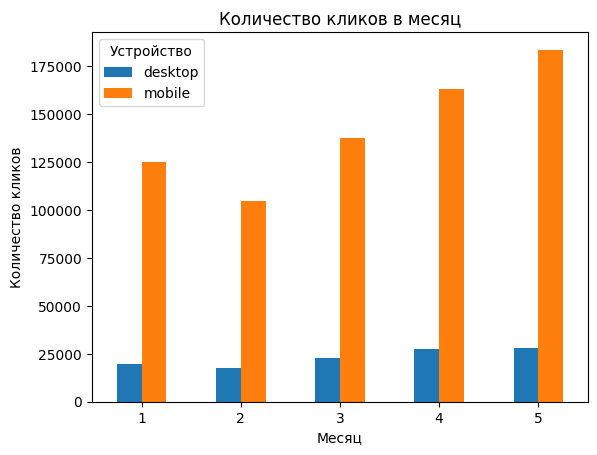

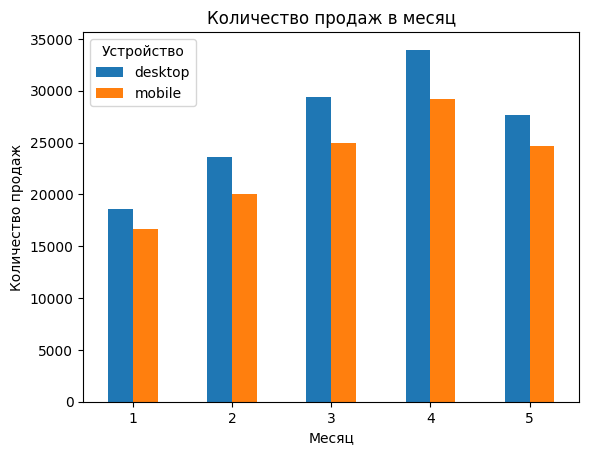

In [24]:
# Подсчет кликов и заказов по месяцу и устройству
clicks_by_segment = df[df['title'] == 'banner_click'].groupby(['month', 'site_version']).size().unstack()
orders_by_segment = df[df['title'] == 'order'].groupby(['month', 'site_version']).size().unstack()

clicks_by_segment.plot(kind = 'bar', label = 'Устройство')
plt.title('Количество кликов в месяц')
plt.ylabel('Количество кликов')
plt.xlabel('Месяц')
plt.xticks(rotation = 0)
plt.legend(title = 'Устройство')

orders_by_segment.plot(kind = 'bar', label = 'Устройство')
plt.title('Количество продаж в месяц')
plt.ylabel('Количество продаж')
plt.xlabel('Месяц')
plt.xticks(rotation = 0)
plt.legend(title = 'Устройство', loc = 'upper left')

plt.show()

Пользователи намного активнее переходят по баннерам с мобильных устройств и это логично, так как телефон всегда под рукой. <br>
Но заказы люди чаще совершают через ПК. Скорее всего это связано с неудобстом интерфейса при покупке через телефон.

# Посмотрим на количесвто уникальных пользователей в месяц

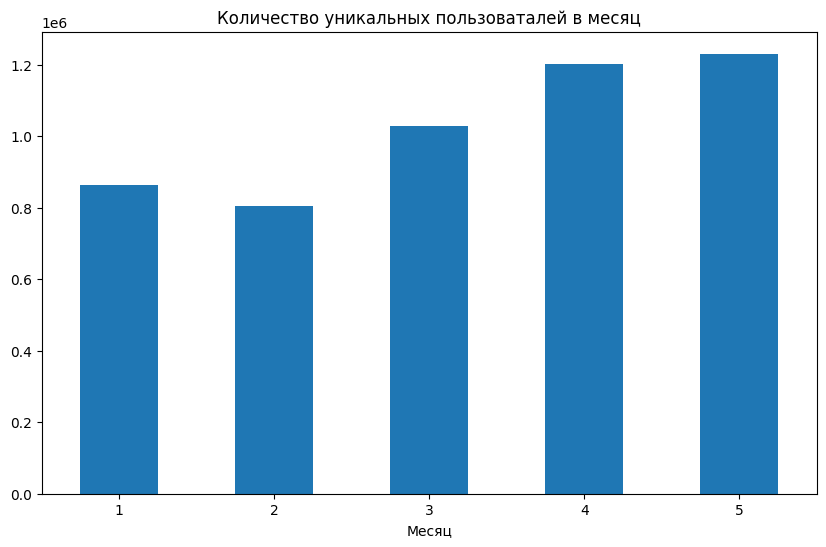

month
1     864105
2     805519
3    1026910
4    1202590
5    1230277
Name: user, dtype: int64

In [25]:
# Считаем количество уникальных пользователей за каждый месяц
uniq_users = df.groupby('month')['user'].nunique()

plt.figure(figsize=(10, 6))
uniq_users.plot(kind = 'bar')
plt.title('Количество уникальных пользоваталей в месяц')
plt.xlabel('Месяц')
plt.xticks(rotation=0)
plt.show()

uniq_users

### Количество уникальных пользователей растет, что говорит о положительной динамике "роста" онлайн-магазина

In [26]:
# Уникальные пользователи, которым показывались баннеры
banner_shows = df[df['title'] == 'banner_show']
uniq_user_show = banner_shows.groupby('month')['user'].nunique()

# Уникальные пользователи, кликнувшие на баннеры
uniq_user_click = click_data.groupby('month')['user'].nunique()

# Уникальные пользователи, совершившие покупки после клика
orders = df[df['title'] == 'order']
uniq_user_orders = orders[orders['user'].isin(click_data['user'])]  # Пользователи, которые совершили заказ после клика
uniq_user_conv = uniq_user_orders.groupby('month')['user'].nunique()

results = pd.DataFrame({
    'uniq_shows': uniq_user_show,
    'uniq_clicks': uniq_user_click,
    'uniq_orders': uniq_user_conv
})

results['CTR %'] = round( (results['uniq_clicks'] / results['uniq_shows']) * 100, 2)
results['Конверсия %'] = round( (results['uniq_orders'] / results['uniq_clicks']) * 100, 2)
results

,uniq_shows,uniq_clicks,uniq_orders,CTR %,Конверсия %
month,,,,,
1,855765,134111,16478,15.67,12.29
2,786541,115283,20323,14.66,17.63
3,1006185,150278,25394,14.94,16.90
4,1178869,178151,29690,15.11,16.67
5,1217483,194977,24660,16.01,12.65


CTR для новых пользоваталей с каждым месяцем не актвино, но увеличивается. Возможно, это связано с неуверенностью новых пользователей в новом для них магазине или пользователям показывается реклама, не соответсвующая их потребностям. (однако CTR 14-16 % это высокий показатель). <br>
Конверсия для уникальных пользователей с каждым месяцем падает. Она всё-равно остается на высоком уровне, но заметен спад. Это опять же может быть связано с тем, что пользователям неудобно совершать заказы через мобильные устройства.

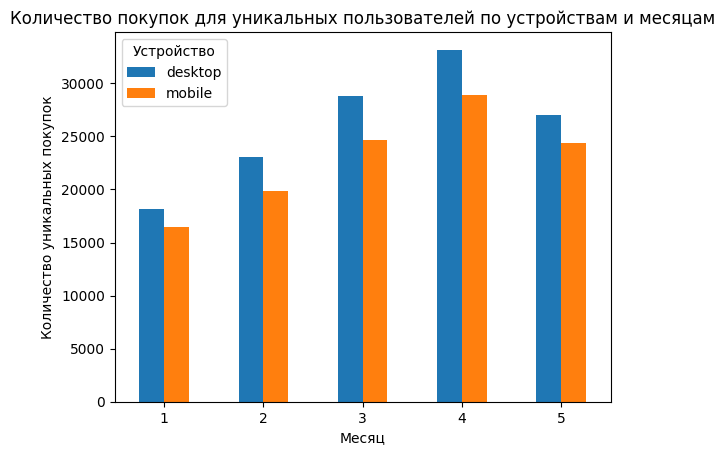

In [27]:
# Уникальные пользователи, совершившие покупки по месяцам и устройствам
uniq_order_site_version = orders_.groupby(['site_version', 'month'])['user'].nunique()

orders_df = uniq_order_site_version.unstack(level=0)  

orders_df.plot(kind='bar')
plt.title('Количество покупок для уникальных пользователей по устройствам и месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных покупок')
plt.xticks(rotation=0)
plt.legend(title='Устройство', loc = 'upper left')
plt.show()

Уникальные пользователи чаще совершают покупки через компьютер, что подтверждает вывод о спаде конверсии, который приведен выше.

In [28]:
orders = df[df['title'] == 'order']
banner_show = df[df['title'] == 'banner_show']

# Уникальные user, которые кликнули и соверишили покупку
uniq_users_clicks = set(click_data['user'])
uniq_users_orders = set(orders['user'])

# Сколько пользователей кликнули и совершили покупку
users_converted = [user for user in uniq_users_clicks if user in uniq_users_orders]

total_show = len(banner_show['user'].unique())

# Конверсия
total_clicks = len(click_data['user'].unique()) # Уникальные кликнувшие пользователи (click_data = df[df['title'] == 'banner_click'])
total_convers = len(users_converted) # кол-во совершивших покупку   

CTR_ = round( (total_clicks / total_show) * 100, 2)
conversion_rate = round( total_convers / total_clicks * 100, 2)

print('Для уникальных пользователей:')
print(f'CTR за весь период: {CTR_} %')
print(f'Конверсия за весь период: {conversion_rate} %')

Для уникальных пользователей:
CTR за весь период: 17.45 %
Конверсия за весь период: 15.09 %


Посчитав общую конверсию и CTR за весь период для уникальных пользоваталей, можно сказать, что пользователям интересны показывающиеся им баннеры и они активно покупают продукты, которые рекламируются на баннерах.

### Тест 
Так как неизвестна средняя стоимость заказа и предложение цены за клик, предположу эти значения. Проведу анализ в зависимости он разных значений средней стоимости и цены за клик.

In [39]:
total_clicks = len(df_banner_click['user'].unique())  
total_orders = len(orders_['user'].unique()) 
print(total_clicks)
print(total_orders)

# Ставка CPC 
CPC = np.arange(100, 301, 100) 
# Стоимость заказа
order_values = np.arange(500, 2001, 500)

table_result = pd.DataFrame(index = order_values, columns = CPC)

for order_value in order_values:
    for CPC_ in CPC:
        revenue_cpc = total_clicks * CPC_  # Доход по CPC
        revenue_orders = total_orders * order_value  # Доход от заказов
        table_result.loc[order_value, CPC_] = revenue_cpc - revenue_orders

# Преобразуем значения в числовой формат
table_result = table_result.astype(float)

# Выводим таблицу
print('Разница доходов:')
table_result

742459
237866
Разница доходов:


,100,200,300
500,-44687100.0,29558800.0,103804700.0
1000,-163620100.0,-89374200.0,-15128300.0
1500,-282553100.0,-208307200.0,-134061300.0
2000,-401486100.0,-327240200.0,-252994300.0


Вывод: для большинства предложенных мною значений цены за клик и среднем доходе от заказов вывод следующий: продажа баннера под сторонние ресурсы невыгодна для магазина. 

# Основыне выводы: 
#### В магазине очень хорошие показатели по CTR и конверсии по основным продуктам: 
- Одежда (15.18% и 51.1%), обувь (12.57% и 37.09%), аксессуары (9.46% и 32.7%), спортинвое питание (9.86% и 16.38%) <br>
По этим данным можно сделать вывод, что баннеры хорошо работают для привлечения покупателей в онлайн-магазин. Продажа баннера под сторонние ресурсы может значительно снизить показатели продаж в магазине. 
#### Результаты по количеству кликов и продаж каждый месяц:
- Количество кликов и продаж растет с каждым месяцем, что говорит о положительном результате "работы" баннеров, а пик активности пользователей приходится на утреннее время (6:00 - 12:00)
#### Количесвто уникальных пользователей:
- Количество униакльных пользователей растет каждый месяц. 
# Нужно ли продавать это место для рекламы другого сервиса? 
Однознаый ответ - нет. Текущие показатели CTR и Конверсии показывают, что банеры имеют высокую эффективность в работе онлайн-магазина.
# Рекомендации для улучшения: 
- Стоит провести таргетированный показ баннеров.
- Так как конверсия пользователей с телефонов ниже, чем с компьютеров, это может говорить о неудобстве интерфейса магазина через мобильное устройство. Это важно, так как большая часть пользователей переходят на баннеры именно через телефон.